<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/oversampling_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
path = '/gdrive/My Drive/'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 14

In [81]:
df = pd.read_csv(path + 'data_cvs_resp.csv')

In [82]:
df.drop(['Unnamed: 0'], axis = 1, inplace= True)

In [83]:
cols=df.shape[1]
print("columns = {}".format(cols))

columns = 9


In [84]:
df.columns = map(str.lower, df.columns)
df.columns

Index(['hr', 'o2sat', 'sbp', 'map', 'dbp', 'resp', 'age', 'gender',
       'sepsislabel'],
      dtype='object')

In [85]:
df['sepsislabel'] = df['sepsislabel'].astype('category')

In [86]:
df['gender']=df['gender'].astype('category')

In [87]:
df=df.sample(n=20000, random_state=1234, axis=None, weights=None)

In [88]:
y = df.sepsislabel.values
x = df.drop(["sepsislabel", 'gender'], axis = 1)

In [89]:
x=(x-x.mean())/(x.max()-x.min())

In [90]:
x.head()

,hr,o2sat,sbp,map,dbp,resp,age
350586,0.185139,0.079287,-0.258963,-0.061076,-0.021065,-0.040390,-0.324787
300080,-0.029147,-0.420713,0.544775,0.514681,0.520602,-0.123723,0.102475
1136672,0.518472,0.079287,0.096177,0.484378,0.520602,-0.040390,-0.159906
31178,-0.243433,0.412621,-0.455225,-0.313500,-0.021065,-0.332056,-0.062644
1135430,-0.052957,0.079287,0.395242,0.151045,-0.479398,-0.457056,-0.207525


In [91]:
import imblearn

In [92]:
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)

In [94]:
ros = RandomOverSampler()
x, y = ros.fit_sample(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [95]:
print('After OverSampling, the shape of X: {}'.format(x.shape))
print('After OverSampling, the shape of y: {} \n'.format(y.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y==0)))

After OverSampling, the shape of X: (39224, 7)
After OverSampling, the shape of y: (39224,) 

After OverSampling, counts of label '1': 19612
After OverSampling, counts of label '0': 19612


In [96]:
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,make_scorer
from numpy.random import seed
seed(1)

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

## logistic regression

In [98]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)

model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
train_pred = model.predict(x_train)

test_pred = model.predict(x_test)

# Use score method to get accuracy of model
score = model.score(x_train, y_train)
print('Train F1 Score = {} %'.format(round(score,4)*100))

# Use score method to get accuracy of model
score = model.score(x_test, y_test)
print('Test F1 Score = {} %'.format(round(score,4)*100))

Train F1 Score = 58.5 %
Test F1 Score = 58.89 %


In [100]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, train_pred)
train_accuracy = round(train_accuracy, 4)*100
print('Training Accuracy = {} %'.format(train_accuracy))

test_accuracy = accuracy_score(y_test, test_pred)
test_accuracy = round(test_accuracy, 4)*100
print('Test Accuracy = {} %'.format(test_accuracy))

Training Accuracy = 58.5 %
Test Accuracy = 58.89 %


[[3689 2185]
 [2653 3241]]


Text(0.5, 1.0, 'Test F1 Score:58.89%')

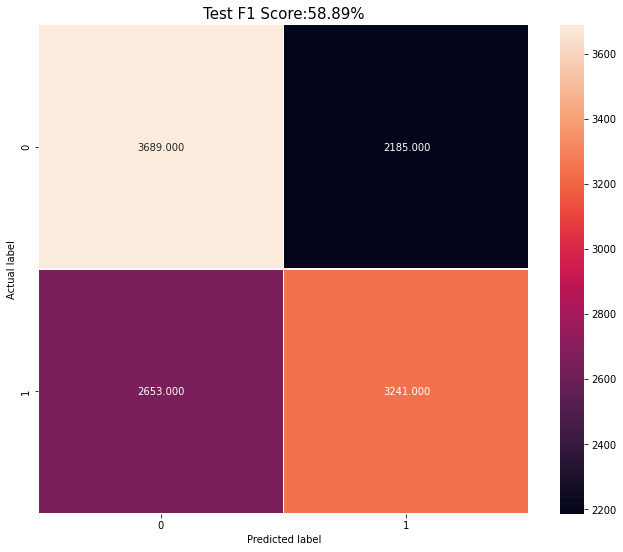

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, test_pred)
print(conf_matrix)

plt.figure(figsize=(11,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test F1 Score:{}%'.format(round(score, 4)*100)
plt.title(all_sample_title, size = 15)

In [102]:
from sklearn.metrics import classification_report

print('*********************  Training Data Report  **********')
print(classification_report(y_train, train_pred))

print('***********************  Test Data Report  **********')
print(classification_report(y_test, test_pred))


*********************  Training Data Report  **********
              precision    recall  f1-score   support

           0       0.58      0.61      0.60     13738
           1       0.59      0.56      0.57     13718

    accuracy                           0.59     27456
   macro avg       0.59      0.58      0.58     27456
weighted avg       0.59      0.59      0.58     27456

***********************  Test Data Report  **********
              precision    recall  f1-score   support

           0       0.58      0.63      0.60      5874
           1       0.60      0.55      0.57      5894

    accuracy                           0.59     11768
   macro avg       0.59      0.59      0.59     11768
weighted avg       0.59      0.59      0.59     11768



##Support vector classifier

In [103]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf')
classifier_rbf.fit(x_train, y_train)
y_pred = classifier_rbf.predict(x_test)
print('Accuracy of SVC (RBF) classifier on test set: {:.2f}'.format(classifier_rbf.score(x_test, y_test)))

Accuracy of SVC (RBF) classifier on test set: 0.73


In [104]:
train_pred = classifier_rbf.predict(x_train)

test_pred = classifier_rbf.predict(x_test)

# Use score method to get accuracy of model
score = classifier_rbf.score(x_train, y_train)
print('Train F1 Score = {} %'.format(round(score,4)*100))

# Use score method to get accuracy of model
score = classifier_rbf.score(x_test, y_test)
print('Test F1 Score = {} %'.format(round(score,4)*100))

Train F1 Score = 73.95 %
Test F1 Score = 73.22 %


[[4133 1741]
 [1411 4483]]


Text(0.5, 1.0, 'Test F1 Score:73.22%')

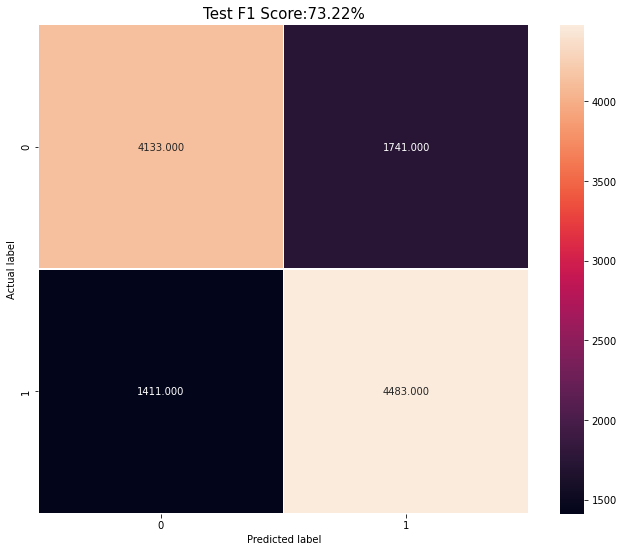

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, test_pred)
print(conf_matrix)

plt.figure(figsize=(11,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test F1 Score:{}%'.format(round(score, 4)*100)
plt.title(all_sample_title, size = 15)

In [106]:
from sklearn.metrics import classification_report

print('*********************  Training Data Report  **********')
print(classification_report(y_train, train_pred))

print('***********************  Test Data Report  **********')
print(classification_report(y_test, test_pred))

*********************  Training Data Report  **********
              precision    recall  f1-score   support

           0       0.75      0.71      0.73     13738
           1       0.73      0.77      0.75     13718

    accuracy                           0.74     27456
   macro avg       0.74      0.74      0.74     27456
weighted avg       0.74      0.74      0.74     27456

***********************  Test Data Report  **********
              precision    recall  f1-score   support

           0       0.75      0.70      0.72      5874
           1       0.72      0.76      0.74      5894

    accuracy                           0.73     11768
   macro avg       0.73      0.73      0.73     11768
weighted avg       0.73      0.73      0.73     11768



In [107]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(x_train, y_train)
    svc_scores.append(svc_classifier.score(x_test, y_test))

In [108]:
from matplotlib.cm import rainbow

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

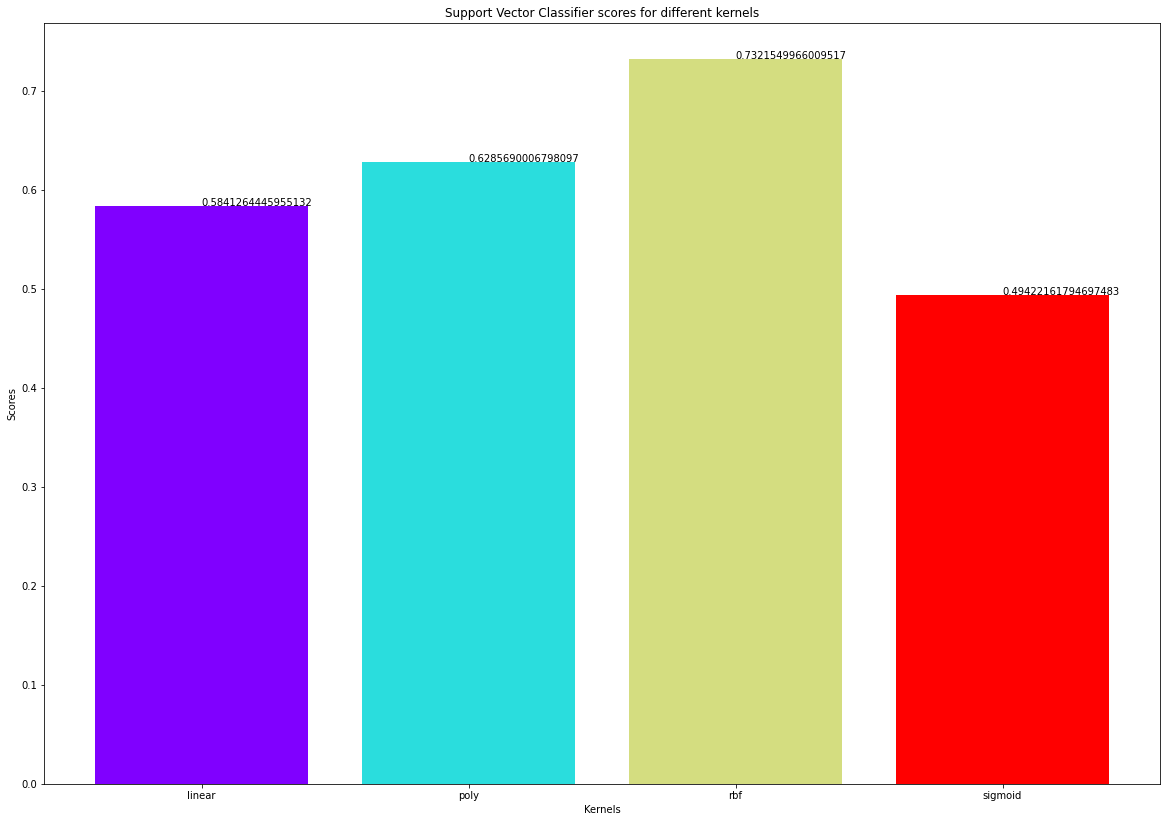

In [109]:
rcParams['figure.figsize'] = 20, 14
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

##random forest classifier

In [110]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(rfc.score(x_test, y_test)))

Accuracy of Random Forest on test set: 1.00


In [111]:
train_pred = rfc.predict(x_train)

test_pred = rfc.predict(x_test)

# Use score method to get accuracy of model
score = rfc.score(x_train, y_train)
print('Train F1 Score = {} %'.format(round(score,4)*100))

# Use score method to get accuracy of model
score = rfc.score(x_test, y_test)
print('Test F1 Score = {} %'.format(round(score,4)*100))

Train F1 Score = 99.76 %
Test F1 Score = 99.8 %


[[5851   23]
 [   0 5894]]


Text(0.5, 1.0, 'Test F1 Score:99.8%')

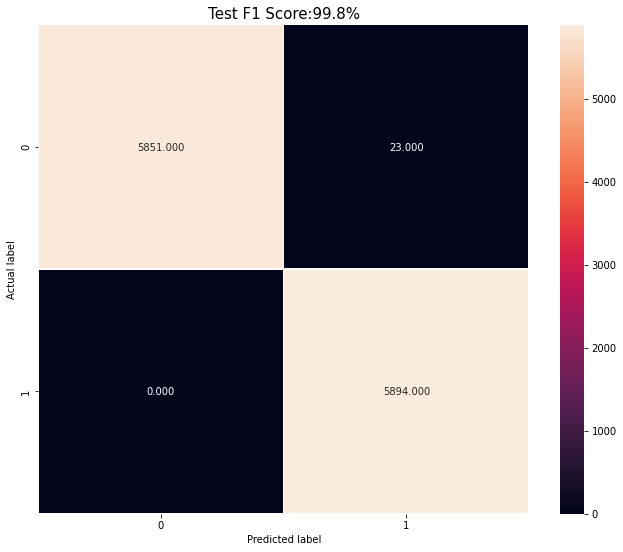

In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, test_pred)
print(conf_matrix)

plt.figure(figsize=(11,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test F1 Score:{}%'.format(round(score, 4)*100)
plt.title(all_sample_title, size = 15)

In [113]:
from sklearn.metrics import classification_report

print('*********************  Training Data Report  **********')
print(classification_report(y_train, train_pred))

print('***********************  Test Data Report  **********')
print(classification_report(y_test, test_pred))

*********************  Training Data Report  **********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13738
           1       1.00      1.00      1.00     13718

    accuracy                           1.00     27456
   macro avg       1.00      1.00      1.00     27456
weighted avg       1.00      1.00      1.00     27456

***********************  Test Data Report  **********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5874
           1       1.00      1.00      1.00      5894

    accuracy                           1.00     11768
   macro avg       1.00      1.00      1.00     11768
weighted avg       1.00      1.00      1.00     11768



In [114]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(x_train, y_train)
    rf_scores.append(rf_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

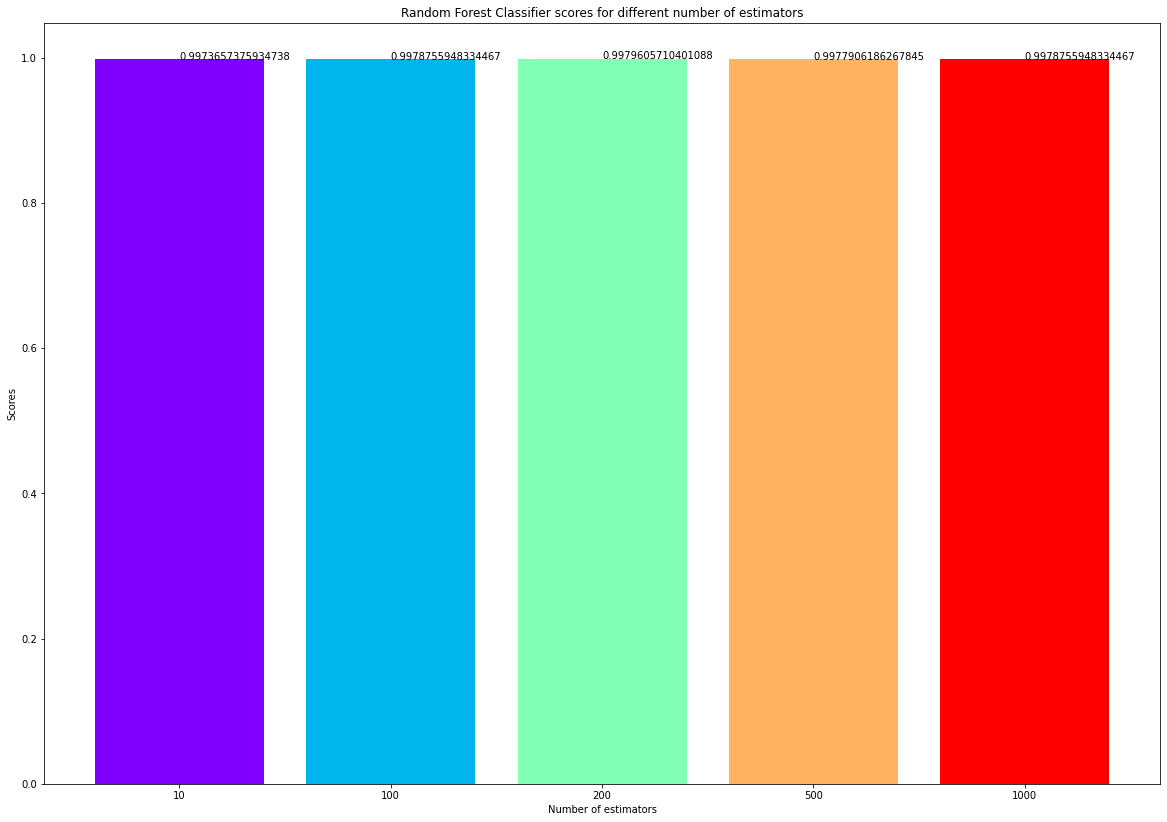

In [115]:
rcParams['figure.figsize'] = 20, 14
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

##decision tree

In [118]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(x_train,y_train)
    y_pred_dt = dt.predict(x_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [120]:
print(y_pred_dt.shape)

(11768,)


In [121]:
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 98.66 %


In [122]:
rain_pred = dt.predict(x_train)

test_pred = dt.predict(x_test)

# Use score method to get accuracy of model
score = dt.score(x_train, y_train)
print('Train F1 Score = {} %'.format(round(score,4)*100))

# Use score method to get accuracy of model
score = dt.score(x_test, y_test)
print('Test F1 Score = {} %'.format(round(score,4)*100))

Train F1 Score = 99.76 %
Test F1 Score = 98.66 %


[[5716  158]
 [   0 5894]]


Text(0.5, 1.0, 'Test F1 Score:98.66%')

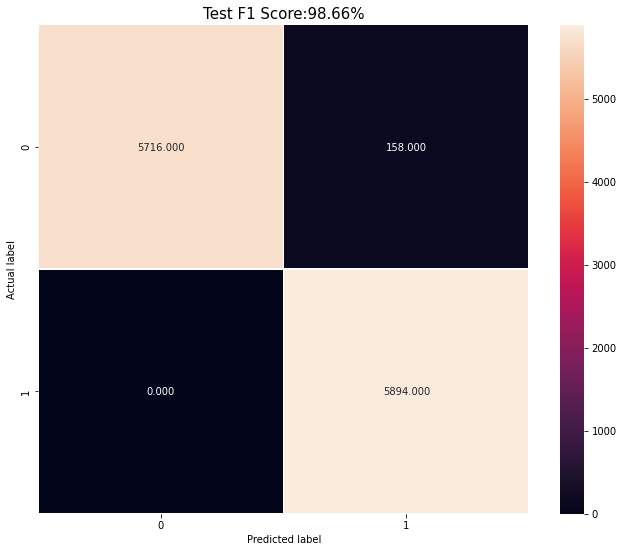

In [123]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, test_pred)
print(conf_matrix)

plt.figure(figsize=(11,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test F1 Score:{}%'.format(round(score, 4)*100)
plt.title(all_sample_title, size = 15)

In [124]:
from sklearn.metrics import classification_report

print('*********************  Training Data Report  **********')
print(classification_report(y_train, train_pred))

print('***********************  Test Data Report  **********')
print(classification_report(y_test, test_pred))

*********************  Training Data Report  **********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13738
           1       1.00      1.00      1.00     13718

    accuracy                           1.00     27456
   macro avg       1.00      1.00      1.00     27456
weighted avg       1.00      1.00      1.00     27456

***********************  Test Data Report  **********
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      5874
           1       0.97      1.00      0.99      5894

    accuracy                           0.99     11768
   macro avg       0.99      0.99      0.99     11768
weighted avg       0.99      0.99      0.99     11768

